In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

import matplotlib.patches as patches
from PIL import Image
import math

In [4]:
from bokeh.charts import Donut
from bokeh.layouts import widgetbox, row, layout
from bokeh.models.widgets import TextInput, Slider, PreText
from bokeh.plotting import figure, output_file, curdoc

from pymongo import MongoClient
import pandas as pd

In [5]:
db = MongoClient('mongodb://localhost/SmartHome', 27017).SmartHome

In [6]:
cursor = db.video_hallway.find({'t': { '$lt': 20 } })
x = []
y = []
angle = []

tl_x = []
tl_y = []

br_x = []
br_y = []

d3_x = []
d3_y = []
d3_z = []
            
for i in cursor:
            px_x = i['centre_2d_x']
            px_y = i['centre_2d_y']
            x.append(px_x);
            y.append(px_y);
            
            px_x = i['bb_2d_tl_x']
            px_y = i['bb_2d_tl_y']
            tl_x.append(px_x);
            tl_y.append(px_y);
 
            px_x = i['bb_2d_br_x']
            px_y = i['bb_2d_br_y']
            br_x.append(px_x);
            br_y.append(px_y);
            
            px_x = i['centre_3d_x']
            px_y = i['centre_3d_y']
            px_z = i['centre_3d_z']
            
            d3_x.append(px_x)
            d3_y.append(px_y)
            d3_z.append(px_z)
            
            angle.append(0.0)

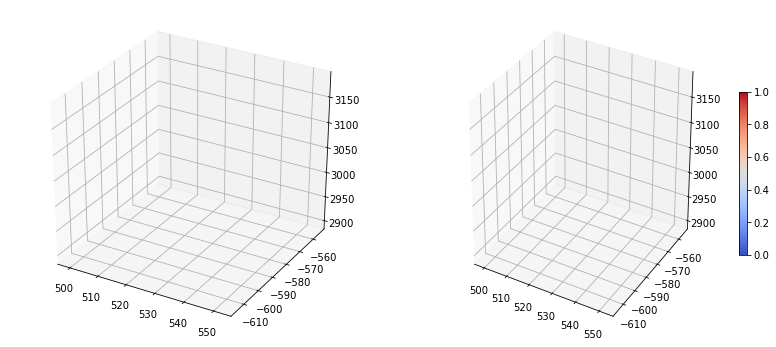

In [7]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib
fig = plt.figure(figsize=(14,6))

# `ax` is a 3D-aware axis instance because of the projection='3d' keyword argument to add_subplot
ax = fig.add_subplot(1, 2, 1, projection='3d')

p = ax.plot_surface(d3_x[1], d3_y[1], d3_z[1], rstride=4, cstride=4, linewidth=0)

# surface_plot with color grading and color bar
ax = fig.add_subplot(1, 2, 2, projection='3d')
p = ax.plot_surface(d3_x[1], d3_y[1], d3_z[1], rstride=1, cstride=1, cmap=matplotlib.cm.coolwarm, linewidth=0, antialiased=False)
cb = fig.colorbar(p, shrink=0.5)
plt.show()

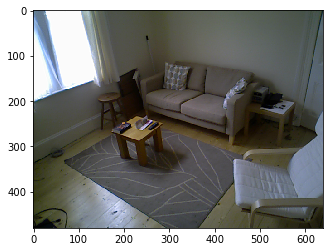

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
im = np.array(Image.open('living_room.png'), dtype=np.uint8)


# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

patch = patches.Rectangle((0, 0), 0, 0, fc='y')

In [8]:
# # initialization function: plot the background of each frame

def init():
    ax.add_patch(patch)
    return patch,

In [9]:
# animation function. This is called sequentially
import random

def animate(i):
    center_2d_x = x[i]
    center_2d_y = y[i]

    bb_2d_br_x = br_x[i]
    bb_2d_br_y = br_y[i]

    bb_2d_tl_x = tl_x[i]
    bb_2d_tl_y = tl_y[i]


    height =  bb_2d_br_y - bb_2d_tl_y

    weidth =  bb_2d_br_x - bb_2d_tl_x

    patch.set_width(weidth)
    patch.set_height(height)
    
    patch.set_xy([x[i] , y[i]])
#     patch._angle = -np.rad2deg(angle[i])
    
    return patch,

In [10]:
anim = animation.FuncAnimation(fig, animate,
                               init_func=init,
                               frames=len(x),
                               interval=500,
                               blit=True)
plt.show()
HTML(anim.to_html5_video())

In [11]:
anim._repr_html_() is None
anim

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5')
anim

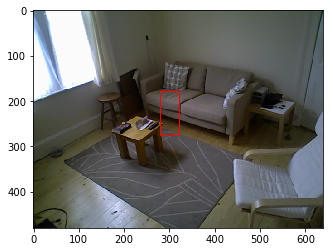

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np
import math
im = np.array(Image.open('living_room.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

center_2d_x = 280
center_2d_y = 177

bb_2d_br_x = 307
bb_2d_br_y = 169
 
bb_2d_tl_x = 266
bb_2d_tl_y = 72


height =  bb_2d_br_y - bb_2d_tl_y

weidth =  bb_2d_br_x - bb_2d_tl_x

# Create a Rectangle patch
rect = patches.Rectangle((center_2d_x,center_2d_y),weidth,height,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show()